In [ ]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
import seaborn as sns
import torch.nn as nn
import torch.nn.functional as fn
%matplotlib inline
from torch import Tensor

Creating an Artificial Neural Network Using Pytoch

In [ ]:
df = pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# We have used .values in order to convert them in numpy arrays
X = df.drop('Outcome' , axis = 1).values 
y = df['Outcome'].values

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3 , random_state = 42)

In [ ]:
# Creating Tensors 
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
df.shape

(768, 9)

In [ ]:
class ANN_Model(nn.Module):
  def __init__(self, input_features = 8 , hidden1 = 20 , hidden2 = 20 , out_features = 2):
    super().__init__() ## To inherit all parent classes
    self.f_connected1 = nn.Linear(input_features,hidden1)
    self.f_connected2 = nn.Linear(hidden1 , hidden2)
    self.out = nn.Linear(hidden2, out_features)

  def forward(self,x):
    # Perfrom the calculation of the model to determine the prediciton
    x = fn.relu(self.f_connected1(x))
    x = fn.relu(self.f_connected2(x))
    x = self.out(x)
    return x

In [ ]:
torch.manual_seed(20)
model = ANN_Model()

In [ ]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [ ]:
# BackWard Propogation = We do backpropagation in order to optimize the model while traversing backward and collecting deravatives of error
# Define the loss function and define the optimizer

In [ ]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters() , lr = 0.01)

In [ ]:
epochs = 500
final_loss = []
for i in range(epochs):
  i = i + 1
  y_pred = model.forward(X_train)
  # Calculate the loss
  loss = loss_function(y_pred, y_train)
  final_loss.append(loss)
  if i%10 == 1:
    print("Epoch Number {} and loss is {}".format(i,loss.item()))
  # Before calculating the gradients, we need to ensure that they are all zero.  
  # The gradients would not be overwritten, but actually added to the existing ones.
  optimizer.zero_grad() # Set the gradient to zero for all tensors
  # Perform backpropagation
  loss.backward()
  optimizer.step()  # Perform single optimization step

Epoch Number 1 and loss is 3.4973037242889404
Epoch Number 11 and loss is 0.7941919565200806
Epoch Number 21 and loss is 0.5918703079223633
Epoch Number 31 and loss is 0.5903772711753845
Epoch Number 41 and loss is 0.5682151317596436
Epoch Number 51 and loss is 0.5544655323028564
Epoch Number 61 and loss is 0.5448209047317505
Epoch Number 71 and loss is 0.5348998308181763
Epoch Number 81 and loss is 0.5247223973274231
Epoch Number 91 and loss is 0.5149424076080322
Epoch Number 101 and loss is 0.5053759217262268
Epoch Number 111 and loss is 0.4964122176170349
Epoch Number 121 and loss is 0.4885736405849457
Epoch Number 131 and loss is 0.48148709535598755
Epoch Number 141 and loss is 0.4805178642272949
Epoch Number 151 and loss is 0.46825045347213745
Epoch Number 161 and loss is 0.46075451374053955
Epoch Number 171 and loss is 0.454618364572525
Epoch Number 181 and loss is 0.45802056789398193
Epoch Number 191 and loss is 0.4659009575843811
Epoch Number 201 and loss is 0.4555690586566925


In [ ]:
predictions = []
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_pred = model(data)
    predictions.append(y_pred.argmax().item())
    print(y_pred.argmax().item())

0
0
0
0
1
0
0
0
1
0
0
1
1
0
0
1
0
0
1
0
1
0
1
0
0
1
0
0
0
0
0
0
1
1
0
1
1
0
0
1
0
0
0
0
0
1
1
0
0
1
0
1
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
1
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
1
1
0
0
0
1
0
1
0
0
0
1
0
0
1
0
0
1
0
0
0
0
1
0
0
1
1
0
1
0
0
0
1
0
0
1
1
0
0
0
0
1
0
1
0
0
0
1
0
0
1
0
0
0
1
0
1
0
1
1
0
0
0
1
0
0
1
1
1
0
0
1
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
1
1
0
0
0
0
0
0
1
1
0
1
1
0
0
0
0
1
1
0
0
0
0


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)
cm

array([[127,  24],
       [ 37,  43]])

Text(69.0, 0.5, 'Predicted Values')

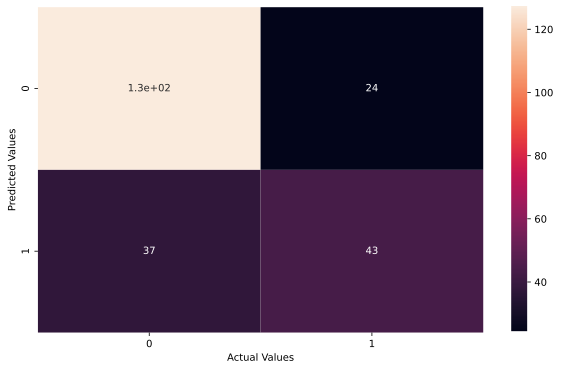

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.7359307359307359

In [ ]:
#### Save the model
torch.save(model,'diabetes.pt')

In [ ]:
#### Save And Load the model
model=torch.load('diabetes.pt')

In [ ]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)